In [2]:
import numpy as np
import scipy.special

In [5]:
# neural network class definition
# 如下代码用于创建、计算和查询三层神经网络
class neuralNetwork:
    
    #initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrates):
        # 设置每层的节点数
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # 设置学习率
        self.lr = learningrates
        
        # 设置链接权重
        #self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        #self.who = np.random.rand(self.onodes, self.hnodes) - 0.
        # 使用正态概率分区采样权重（均值为0，方差为传入链接数目的开方导数）
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0,5), (self.onodes, self.hnodes))
        
        # 设置激活函数:sigmoid
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # 给定训练样本计算输出
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        # 计算隐藏层输出
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        # 计算最终输出层
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 计算误差
        output_errors = targets - final_outputs
        
        # 计算隐含层节点反向传播的误差
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 更新隐藏层和输出层之间的权重
        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), np.transpose(hidden_outputs))
        # 更新输入层和隐藏层之间的权重
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), np.transpose(inputs))
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # 将inputs_list转换为2d array，即将含有n个数的list转换为n行1列的矩阵
        inputs = np.array(inputs_list, ndmin = 2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        # 计算最终输出层
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [6]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.query([1.0, 0.5, -1.5])

array([[0.43658514],
       [0.39320493],
       [0.58481319]])

In [7]:
inputs_list = [1.0, 0.5, -1.5]
inputs_list

[1.0, 0.5, -1.5]

In [8]:
np.array(inputs_list, ndmin = 2).T

array([[ 1. ],
       [ 0.5],
       [-1.5]])

In [9]:
np.transpose(np.array(inputs_list, ndmin = 2))

array([[ 1. ],
       [ 0.5],
       [-1.5]])

**如下，载入训练数据**

In [10]:
data_file = open("./mnist_dataset/mnist_train_100.csv",'r')
data_list = data_file.readlines()
data_file.close()

data_list[:1]

['5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

** 训练数据打印测试 **

In [11]:
import matplotlib.pyplot 
%matplotlib inline

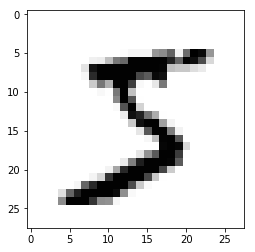

In [12]:
all_value = data_list[0].split(",")
# asfarray：是numpy数组且是float类型
image_array = np.asfarray(all_value[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, interpolation = 'None', cmap = 'Greys')

** 模型训练和测试 **

In [68]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.2

In [69]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [70]:
# 载入mnist数据集的训练数据
# training_data_file = open("./mnist_dataset/mnist_train_100.csv", 'r')
training_data_file = open("./mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [71]:
# 训练模型
epochs = 5

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass

In [72]:
# 载入mnist数据集的测试数据
# test_data_file = open("./mnist_dataset/mnist_test_10.csv", 'r')
test_data_file = open("./mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [73]:
all_values = test_data_list[0].split(',')
print(all_values)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

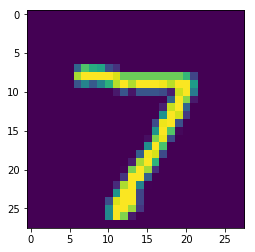

In [74]:
matplotlib.pyplot.imshow(np.asfarray(all_values[1:]).reshape([28,28]))

In [75]:
# 从已训练的模型中查询该数据的预测值
n.query(np.asfarray(all_values[1:])/255.0*0.99 + 0.01)

array([[2.88126700e-02],
       [1.43343235e-03],
       [4.57163596e-03],
       [2.23592116e-02],
       [1.85032452e-04],
       [6.12980179e-04],
       [9.58115919e-04],
       [9.31291324e-01],
       [7.56783451e-03],
       [1.32768414e-04]])

In [76]:
# 测试神经网络
scorecard = []

# 遍历测试数据集
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print("正确的标签是：", correct_label)
    
    inputs = (np.asfarray(all_values[1:])/255.0*0.99 + 0.01)
    outputs = n.query(inputs)
    
    label = np.argmax(outputs)
    
    print("预测的标签是：", label)
    
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    
    pass

正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 4
预测的标签是： 4
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 9
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4


正确的标签是： 8
预测的标签是： 2
正确的标签是： 2
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 2
预测的标签是： 8
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 8
预测的标签是： 8


预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 7
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 8
预测的标签是： 8
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5


预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8
预测的标签是： 8
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 5
预测的标签是： 5
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 0
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9


正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 9
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 5
预测的标签是： 5
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 9
正确的标签是： 2
预测的标签是： 2
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 9
预测的标签是： 8
正确的标签是： 4
预测的标签是： 9


正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 9


预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 0
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 2
预测的标签是： 2
正确的标签是： 5
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6


预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 8
预测的标签是： 8
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 3
正确的标签是： 3


正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8
预测的标签是： 8
正确的标签是： 3
预测的标签是： 3
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 0
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 8
预测的标签是： 8
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 2
预测的标签是： 2
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 8
预测的标签是： 8
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 9
预测的标签是： 9


正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 5
预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 4
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 8
正确的标签是： 6
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8


预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 4
预测的标签是： 4
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 2
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8


预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 8
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 9
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 5
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2


正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 5
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 4
预测的标签是： 4
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6


正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 7
正确的标签是： 5
预测的标签是： 0
正确的标签是： 7
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 8
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1


预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6
预测的标签是： 6
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 8
预测的标签是： 8
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9


预测的标签是： 5
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 7
预测的标签是： 7
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 7
预测的标签是： 7
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3


正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 2
预测的标签是： 8
正确的标签是： 4
预测的标签是： 2
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 9
预测的标签是： 9
正确的标签是： 2
预测的标签是： 2
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 6
预测的标签是： 6
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0


正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 6
预测的标签是： 6
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 1
预测的标签是： 1
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 4
预测的标签是： 4
正确的标签是： 9
预测的标签是： 9
正确的标签是： 7
预测的标签是： 7
正确的标签是： 2
预测的标签是： 2
正确的标签是： 9
预测的标签是： 9
正确的标签是： 2
预测的标签是： 2
正确的标签是： 0
预测的标签是： 0
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 0
预测的标签是： 0
正确的标签是： 6
预测的标签是： 6
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 8
预测的标签是： 8


预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4
正确的标签是： 3
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4
正确的标签是： 4
预测的标签是： 4
正确的标签是： 0
预测的标签是： 0
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 3
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 7
预测的标签是： 7
正确的标签是： 5
预测的标签是： 5
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 5
预测的标签是： 5
正确的标签是： 2
预测的标签是： 2
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 6
预测的标签是： 6
正确的标签是： 2
预测的标签是： 2
正确的标签是： 1
预测的标签是： 1
正确的标签是： 3
预测的标签是： 3
正确的标签是： 8
预测的标签是： 8
正确的标签是： 6


预测的标签是： 2
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 9
预测的标签是： 9
正确的标签是： 3
预测的标签是： 3
正确的标签是： 3
预测的标签是： 3
正确的标签是： 5
预测的标签是： 5
正确的标签是： 5
预测的标签是： 5
正确的标签是： 0
预测的标签是： 0
正确的标签是： 7
预测的标签是： 7
正确的标签是： 9
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 5
预测的标签是： 5
正确的标签是： 1
预测的标签是： 1
正确的标签是： 4
预测的标签是： 4
正确的标签是： 1
预测的标签是： 1
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 8
预测的标签是： 8
正确的标签是： 2
预测的标签是： 2
正确的标签是： 6
预测的标签是： 6
正确的标签是： 1
预测的标签是： 1
正确的标签是： 5
预测的标签是： 5
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6
预测的标签是： 6
正确的标签是： 7
预测的标签是： 7
正确的标签是： 8
预测的标签是： 8
正确的标签是： 9
预测的标签是： 9
正确的标签是： 0
预测的标签是： 0
正确的标签是： 1
预测的标签是： 1
正确的标签是： 2
预测的标签是： 2
正确的标签是： 3
预测的标签是： 3
正确的标签是： 4
预测的标签是： 4
正确的标签是： 5
预测的标签是： 5
正确的标签是： 6


In [77]:
# print(scorecard)
scorecard_array = np.array(scorecard)
print("预测准确率：", scorecard_array.sum()/scorecard_array.size)

预测准确率： 0.947
